In [1]:
import numpy as np
import pandas as pd
from os import path
import cv2
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
import requests
import random
import pickle
import re
import collections
from collections import Counter
from tqdm.notebook import tqdm as tqdm_notebook
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib import cm
import matplotlib.colors as colors
import folium
%matplotlib inline

In [2]:
# Get Dutch region
url = "https://raw.githubusercontent.com/tdwg/wgsrpd/master/geojson/level3.geojson"
gdf = gpd.read_file(url)

gdf.columns = ['Region',
              'ISO',
              'x2', 'x3',
              'geometry']

gdf = gdf.drop(columns=['x2', 'x3'])

NLD = gdf[ gdf.Region == 'Netherlands' ]

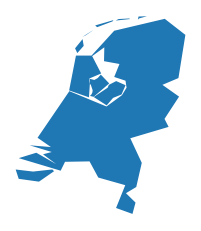

In [3]:
plot = NLD.plot()
plot.set_axis_off()
fig = plot.get_figure()
fig.savefig("mask.png", bbox_inches='tight')
mask = plt.imread("mask.png")
mask = 255 * mask
mask = mask.astype(np.uint8)

In [4]:
scale_percent = 500 # percent of original size
width = int(mask.shape[1] * scale_percent / 100)
height = int(mask.shape[0] * scale_percent / 100)
dim = (width, height)
mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)

In [25]:
descriptions = pickle.load(open('../data/processed/dutch_birdv2_clean.pkl', 'rb'))

In [29]:
data = []
for bird in descriptions.keys():
    data += list(set(descriptions[bird]))

In [30]:
count = Counter(data)

In [32]:
#count

In [33]:
mapping = range(4, 20)
normalized_and_mapped = cm.ScalarMappable(cmap=cm.viridis).to_rgba(mapping)

In [34]:
cmap = cm.viridis
norm = plt.Normalize(4, 20)

color = cmap(norm(4.))

color = colors.rgb_to_hsv((color[0], color[1], color[2]))
f'hsl({color[0]}, {color[1]}%, {color[2]}%)'

'hsl(0.8012824265655186, 0.98520407388856%, 0.329415%)'

In [35]:
cmap = cm.viridis
norm = plt.Normalize(4, 100)
color = cmap(norm(4.))
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    r, g, b, _ = cmap(norm(font_size))
    color =  colors.rgb_to_hsv((r, g, b))
    return f'hsl({color[0] * 100}, {color[1] * 100}%, {color[2] * 100}%)'

In [36]:
wordcloud = WordCloud(max_font_size=100, 
                      max_words=200,
                      width=width, height=height,
                      background_color=None,
                      mode='RGBA',
                      collocations=False,
                      contour_width=3, 
                      contour_color='steelblue',
                      #color_func=grey_color_func,
                      repeat=False,
                      mask=mask).generate_from_frequencies(count)

In [37]:
#default_colors = wordcloud.to_array()
#plt.title("Custom colors")
#wordcloud = wordcloud.recolor(color_func=grey_color_func, random_state=3)

In [38]:
#plt.imshow(wordcloud)

In [39]:
svg = wordcloud.to_svg('frontcover.svg')

with open('frontcover.svg', 'w+') as f:
    f.write(svg)

In [ ]:
default_colors[600][500]

In [ ]:
"hsl(0, 0%%, %d%%)" % random.randint(60, 100)